In [21]:
%pylab
# Imports
import numpy as np
import matplotlib.pyplot as plot
#comment next line to have plot windows outside browser
%matplotlib inline

legScale = 95.8738e-6 # 16 bits to radian
vref = 3.3 # for voltage conversion
vdivide = 3.7/2.7  # for battery scaling
vgain = 15.0/47.0  # gain of differential amplifier
RMotor = 3.3   # resistance for SS7-3.3 ** need to check **
Kt = 1.41 #  motor toriqe constant mN-m/A  ** SS7-3.3 **

#acelerometer scale in mpu6000.c set to +- 8g
# +- 32768 data
xlScale = (1/4096.0) * 9.81

# gyro in mpu6000.c scale set to +-2000 degrees per second
# +- 32768
gyroScale = (1/16.384) * (np.pi/180.0)  

length = 16
width = 8


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/anagabandi/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
# Insert filename here
#filename = './2014.02.03_17.47.54_trial_imudata.txt'
#filename = './2014.02.03_17.53.20_trial_imudata.txt'
#filename = './2014.02.03_17.54.06_trial_imudata.txt'
#filename = '.\power-test.txt'
#filename = '../turner-ip2.5/Python/Data/imudata.txt'
#filename = 'c:/users/ronf/research/development/turner-ip2.5/Python/Data/imudata.txt'


#filename = 'roach/python/Data/2017.06.26_16.32.30_trial_imudata.txt'
filename = 'roach/python/Data/2017.06.27_14.54.14_trial_imudata.txt'

filename = 'roach/python/Data/2017.06.27_14.55.29_trial_imudata.txt'
filename = 'roach/python/Data/2017.06.27_15.03.12_trial_imudata.txt'

filename = 'roach/python/Data/2017.06.27_16.28.49_trial_imudata.txt'

filename = 'roach/python/Data/red/2017.06.27_14.54.14_trial_imudata.txt'
filename = '../Data/zigzag2.txt'
#filename = 'roach/python/Data/2017.09.20_14.39.47_trial_imudata.txt'
#filename = 'c:/users/ronf/research/development/telemetryData/left500right600.txt'
#filename = '../turner-ip2.5/Python/Data/2014.12.02_16.31.40_trialAir_JL_imudata.txt'
#filename= '../turner-ip2.5/Python/Data/2014.12.03_12.45.27_trialAir_1Hz_JL_imudata.txt'  

print (filename)

../Data/zigzag2.txt


In [50]:
# Read in the file
f = open(filename)
lines = f.readlines()
f.close()
print(lines[0])

# Time and Date stamps of trial
dateStamp = lines[0].split()[3]
timeStamp = lines[0].split()[4][:-1]
print ('date, time:', dateStamp, timeStamp)

# Stride Frequency R,L
#rightStrideFreq = float(lines[1].split()[5][:-1])
#leftStrideFreq = float(lines[2].split()[5][:-1])

# Phase (fractional)
#phaseFractional = float(lines[3].split()[4][:-1])

# Script that generated data
#script = lines[4].split()[1]

# Motor Gains
motorGains = list(map(float, lines[5][lines[5].find('[')+1:lines[5].find(']')].replace(',','').split()))
#print ('motorGains =', motorGains)
# test data read
#print ('lines[8:15]', lines[8:15])

# Data splitting
curLine = []
curNum = ''

for a in lines[0]:
    if a.isdigit():
        curNum += a
    else:
        if curNum != '':
            curLine.append(int(curNum))
        curNum = ''
    

print(curLine, lines[0])
def toData(b):
    curLine1 = []
    curNum1 = ''

    for a in b:
        if a.isdigit() or (a == '-' and curNum1 == ''):
            curNum1 += a
        else:
            if curNum1 != '':
                curLine1.append(int(curNum1))
            curNum1 = ''
   
    return curLine1



data = []
for a in lines:
    
    data.append(toData(a))
print(len(data[0]), len(data))

columnHeaders = lines[7].replace("\"% ","").replace(" \"\r\n","").split(' | ')
columns = len(curLine)
rows = len(lines)

print(columns, rows)

data = np.array(data)
#unix: 
#data = np.reshape(map(float,"".join(lines[8:]).replace('\r\n',',')[:-1].split(',')),(rows,columns))
# windows

#data = np.reshape(list(map(float,"".join(lines[8:]).replace('\n',',')[:-1].split(','))),(rows,columns))

print ('first 10 lines of data[]\n', data[0:10])
# Timestamps
time = data[:,0]/1000.0

# Leg Position R,L
#rightLegPos = (data[:,1]*legScale)% (2.0*np.pi)
#leftLegPos = (data[:,2]*legScale) % (2.0*np.pi)
rightLegPos = (data[:,2]*legScale)
leftLegPos = (data[:,1]*legScale) 

# Commanded Leg Position R,L
#commandedRightLegPos = (data[:,3]*legScale) % (2.0*np.pi)
#commandedLeftLegPos = (data[:,4]*legScale) % (2.0*np.pi)
commandedRightLegPos = (data[:,4]*legScale) 
commandedLeftLegPos = (data[:,3]*legScale)

# Duty Cycle R,L
#DCR = -data[:,5]/4000.0
#DCL = -data[:,6]/4000.0
#DCR[DCR < -4000.0] = -4000.0
#DCL[DCL < -4000.0] = -4000.0
# raw 12 bit PWM value. Max = 3900.
# convert to per cent
DCR = 100.0 * data[:,6]/4096.0
DCL = 100.0 * data[:,5]/4096.0

# Gyro X,Y,Z
GyroX = data[:,7]*gyroScale
GyroY = data[:,8]*gyroScale
GyroZ = data[:,9]*gyroScale

# Accelerometer X,Y,Z
AX = data[:,10]*xlScale
AY = data[:,11]*xlScale
AZ = data[:,12]*xlScale

# BackEMF R,L
# A/D data is 10 bits, Vref+ = AVdd = 3.3V, VRef- = AVss = 0.0V
# BEMF volts = (15K)/(47K) * Vm + vref/2 - pidObjs[i].inputOffset
#RBEMF = -data[:,13]*vdivide*vref/1023.0
#LBEMF = -data[:,14]*vdivide*vref/1023.0
RBEMF = data[:,14]*vref/1024.0/vgain  # scale A/D to 0 to 3.3 V range and undo diff amp gain
LBEMF = data[:,13]*vref/1024/vgain

# Battery Voltage in volts
VBatt = data[:,15]*vdivide*vref/1023.0

#Power calculations
# i_m = (VBatt - BEMF)/R
# V_m is just VBatt
# using motor duty cycle as 0-100%
CurrentR = (np.abs(DCR)/100.0)*(np.sign(DCR)*VBatt - RBEMF)/RMotor # i_m_avg = i_m x duty cycle
CurrentL = (np.abs(DCL)/100.0)*(np.sign(DCL)*VBatt - LBEMF)/RMotor # i_m_avg = i_m x duty cycle

# torque calculation
TorqueR = Kt * CurrentR # \Tau = Kt i_m_avg
TorqueL = Kt * CurrentL # \Tau = Kt i_m_avg
    

PowerR = np.abs(VBatt* CurrentR) # P = V_m i_m_avg
PowerL = np.abs(VBatt* CurrentL) # P = V_m i_m_avg

Energy = np.zeros(len(VBatt))
#energy calculation, account that some time samples may be missing
# dt = (time[1] - time[0]) / 1000.0 # time in seconds
for i in range(1,len(VBatt)):
    Energy[i] = Energy[i-1] + (PowerR[i] + PowerL[i]) * (time[i]-time[i-1])/1000.0

#approximate integral of angle
AngleZ = np.zeros(len(GyroZ))
AngleY = np.zeros(len(GyroY))
for i in range(1,len(GyroZ)):
    AngleZ[i] = AngleZ[i-1] + GyroZ[i]/1000.0
    AngleY[i] = AngleY[i-1] + GyroY[i]/1000.0

[0, 0, 0, 3222528, 2619796, 1901, -1973, 498, 907, -156, 1680, -327, 2395, -5, -11, 948]

('date, time:', '3222528,', '2619796')
([0, 0, 0, 3222528, 2619796, 1901, 1973, 498, 907, 156, 1680, 327, 2395, 5, 11, 948], '[0, 0, 0, 3222528, 2619796, 1901, -1973, 498, 907, -156, 1680, -327, 2395, -5, -11, 948]\n')
(16, 8951)
(16, 8951)
('first 10 lines of data[]\n', array([[      0,       0,       0, 3222528, 2619796,    1901,   -1973,
            498,     907,    -156,    1680,    -327,    2395,      -5,
            -11,     948],
       [   1664,    1848,  -17464,       0,       0,       0,       0,
            129,     -37,      79,    -114,     125,    4131,      10,
             -8,     952],
       [   2665,    1856,  -17464,       0,       0,       0,       0,
            131,     -36,      79,    -141,     105,    4169,       6,
              8,     952],
       [   3666,    1864,  -17464,    1864,  -17464,       0,       0,
            130,     -37,      80,    -101,     117,    4138

(16, 8)
(8951, 8951, 8951, 8951, 8951)
8951
[   0    1    2 ..., 8948 8949 8950]
[ 800  801  802 ..., 8947 8948 8949]


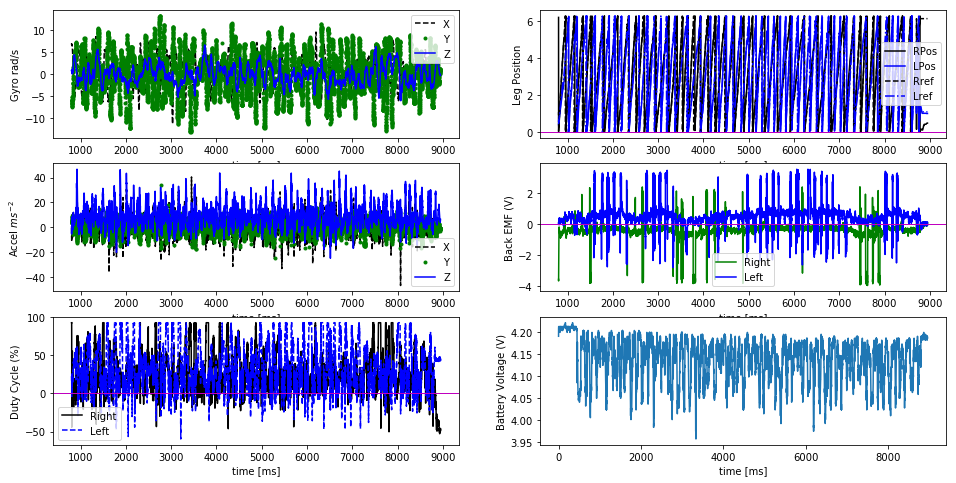

In [51]:
fig = plot.figure(figsize = (length,width))
print(length,  width)


'''a = 0
for b in time:
    if b > a:
        a = b
print(a)
print(max(time))
'''
min=800
max=-1


time = np.arange(len(GyroX))
print(len(GyroX), len(rightLegPos), len(leftLegPos), len(commandedRightLegPos), len(DCL))
print(len(time))
# gyro data
plot.subplot(3,2,1)
plot.plot(time[min:max],GyroX[min:max],'k--')
plot.plot(time[min:max],GyroY[min:max], 'g.')
plot.plot(time[min:max],GyroZ[min:max], 'b')
xlabel('time [ms]')
ylabel('Gyro rad/s')
legend(['X', 'Y', 'Z'])

print(time)
print(time[min:max])

# actual and commanded leg position
plot.subplot(3,2,2)
plot.plot(time[min:max],rightLegPos[min:max]% (2.0*np.pi),'k')
plot.plot(time[min:max],leftLegPos[min:max]% (2.0*np.pi),'b')
plot.plot(time[min:max],commandedRightLegPos[min:max]% (2.0*np.pi), 'k--')
plot.plot(time[min:max],commandedLeftLegPos[min:max]% (2.0*np.pi), 'b-.')
xlabel('time [ms]')
ylabel('Leg Position')
legend(['RPos','LPos','Rref','Lref'])
#plot.plot(time[0:1000],10.0*RBEMF[0:1000],'k')
#plot.plot(time[0:1000],LBEMF[0:1000],'b')
#xlabel('time [ms]')
#ylabel('Left Back EMF (V)')
#legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,2)
ax.axhline(linewidth=1, color='m')

# accelerometer data
plot.subplot(3,2,3)
plot.plot(time[min:max],AX[min:max],'k--')
plot.plot(time[min:max],AY[min:max],'g.')
plot.plot(time[min:max],AZ[min:max],'b')
xlabel('time [ms]')
ylabel('Accel $ m s^{-2}$')
legend(['X', 'Y', 'Z'])

#back EMF
plot.subplot(3,2,4)
plot.plot(time[min:max],RBEMF[min:max],'g')
plot.plot(time[min:max],LBEMF[min:max],'b')
xlabel('time [ms]')
ylabel('Back EMF (V)')
legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,4)
ax.axhline(linewidth=1, color='m')

# Motor PWM 
plot.subplot(3,2,5)
plot.plot(time[min:max],DCR[min:max],'k')
plot.plot(time[min:max],DCL[min:max],'b--')
xlabel('time [ms]')
ylabel('Duty Cycle (%)')
legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,5)
ax.axhline(linewidth=1, color='m')

#battery voltage
plot.subplot(3,2,6)
plot.plot(time[0:max],VBatt[0:max])
xlabel('time [ms]')
ylabel('Battery Voltage (V)')
plot.figure()

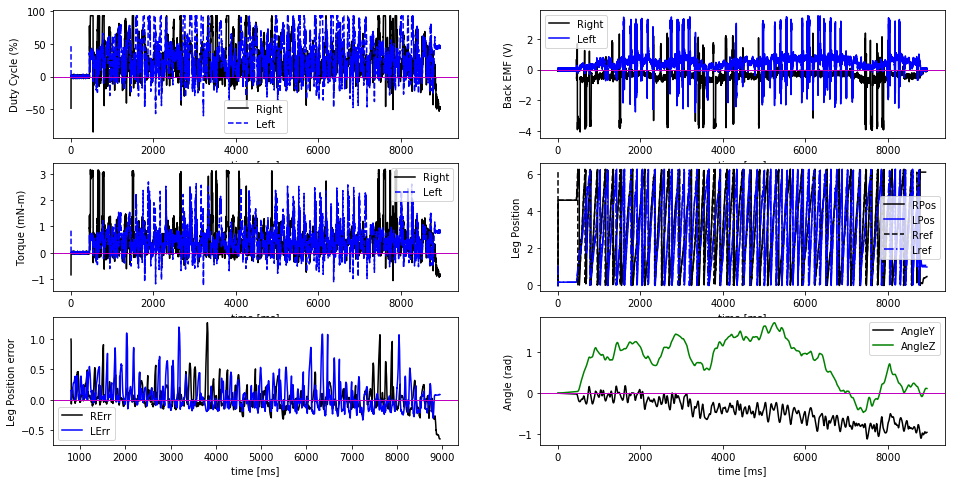

In [52]:
# calculate instant power
fig = figure(figsize = (length,width))


# Motor PWM 
plot.subplot(3,2,1)
plot.plot(time,DCR,'k')
plot.plot(time,DCL,'b--')
xlabel('time [ms]')
ylabel('Duty Cycle (%)')
legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,1)
ax.axhline(linewidth=1, color='m')

#back EMF
plot.subplot(3,2,2)
plot.plot(time,RBEMF,'k')
plot.plot(time,LBEMF,'b')
xlabel('time [ms]')
ylabel('Back EMF (V)')
legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,2)
ax.axhline(linewidth=1, color='m')

#Torque
plot.subplot(3,2,3)
plot.plot(time,TorqueR,'k')
plot.plot(time,TorqueL,'b--')
xlabel('time [ms]')
ylabel('Torque (mN-m)')
legend(['Right', 'Left'])
ax = fig.add_subplot(3,2,3)
ax.axhline(linewidth=1, color='m')

# actual and commanded leg position
min=0 
max=np.size(rightLegPos)
plot.subplot(3,2,4)
xlabel('time [ms]')
# actual and commanded leg position
plot.plot(time[min:max],rightLegPos[min:max]% (2.0*np.pi),'k')
plot.plot(time[min:max],leftLegPos[min:max]% (2.0*np.pi),'b')
plot.plot(time[min:max],commandedRightLegPos[min:max]% (2.0*np.pi), 'k--')
plot.plot(time[min:max],commandedLeftLegPos[min:max]% (2.0*np.pi), 'b-.')
ylabel('Leg Position')
legend(['RPos','LPos','Rref','Lref'])

#plot.plot(time,commandedRightLegPos- rightLegPos,'k')
#plot.plot(time,commandedLeftLegPos - leftLegPos,'b')
#plot.plot(time,commandedRightLegPos, 'k--')
#plot.plot(time,commandedLeftLegPos, 'b-.')

#ylabel('Leg Position error')
#legend(['RErr', 'LErr'])
#battery voltage
#plot.subplot(3,2,4)
#plot.plot(time,VBatt)
#xlabel('time [ms]')
#ylabel('Battery Voltage (V)')


# Motor Power 
plot.subplot(3,2,5)
xlabel('time [ms]')
#plot.plot(time,PowerR,'k')
#plot.plot(time,PowerL,'b--')
#ylabel('battery power (W)')
#legend(['Right', 'Left'])
plot.plot(time[800:-1],commandedRightLegPos[800:-1]- rightLegPos[800:-1],'k')
plot.plot(time[800:-1],commandedLeftLegPos[800:-1] - leftLegPos[800:-1],'b')
ylabel('Leg Position error')
legend(['RErr', 'LErr'])
ax = fig.add_subplot(3,2,5)
ax.axhline(linewidth=1, color='m')



# Total energy 
plot.subplot(3,2,6)
#plot.plot(time,Energy,'k')
xlabel('time [ms]')
#ylabel('battery energy (J)')

# Total Angle in radians
plot.plot(time,AngleY,'k')
plot.plot(time,AngleZ, 'g')
ylabel('Angle (rad)')
legend(['AngleY', 'AngleZ'])
ax = fig.add_subplot(3,2,6)
ax.axhline(linewidth=1, color='m')

plot.figure()